In [ ]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [ ]:
dataSet = pd.read_csv("https://raw.githubusercontent.com/ect-info/ml/master/dados/Social_Network_Ads.csv")

In [ ]:
dataSet.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
dataSet.value_counts("Gender")

Gender
Female    204
Male      196
dtype: int64

In [ ]:
dataSet.value_counts("Purchased")

Purchased
0    257
1    143
dtype: int64

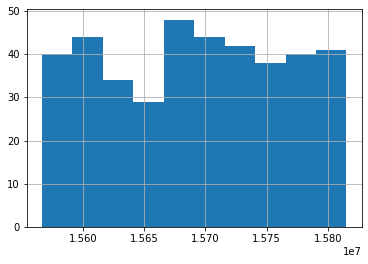

In [ ]:
dataSet["User ID"].hist()

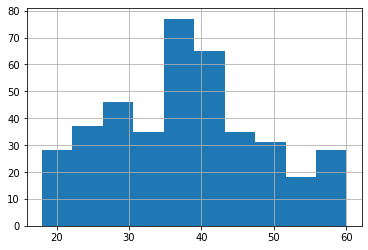

In [ ]:
dataSet["Age"].hist()

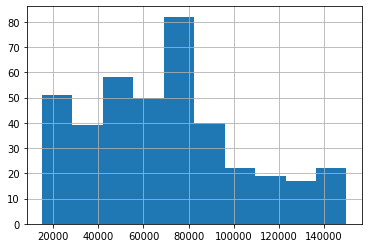

In [ ]:
dataSet["EstimatedSalary"].hist()

In [ ]:
dataSet["Gender"] = dataSet["Gender"].replace("Female", 1).replace("Male", 0)

In [ ]:
dataSet.corr()

,User ID,Gender,Age,EstimatedSalary,Purchased
User ID,1.000000,0.025249,-0.000721,0.071097,0.007120
Gender,0.025249,1.000000,0.073741,0.060435,0.042469
Age,-0.000721,0.073741,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.060435,0.155238,1.000000,0.362083
Purchased,0.007120,0.042469,0.622454,0.362083,1.000000


In [ ]:
x = dataSet[["Gender","Age","EstimatedSalary"]]
y = dataSet["Purchased"]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [ ]:
for col in ["Age", "EstimatedSalary"]:
  std_train = x_train[col].std()
  mean_train = x_train[col].mean()
  x_train[col] = (x_train[col] - mean_train) / std_train
  x_test[col] = (x_test[col] - mean_train) / std_train

In [ ]:
x_train.describe()

,Gender,Age,EstimatedSalary
count,320.000000,3.200000e+02,3.200000e+02
mean,0.500000,3.164136e-16,1.214306e-17
std,0.500783,1.000000e+00,1.000000e+00
min,0.000000,-1.873060e+00,-1.573078e+00
25%,0.000000,-8.020447e-01,-7.465985e-01
50%,0.500000,-2.312420e-02,-9.722199e-02
75%,1.000000,7.557963e-01,5.004996e-01
max,1.000000,2.216272e+00,2.411733e+00


In [ ]:
y_train.value_counts()

0    209
1    111
Name: Purchased, dtype: int64

In [ ]:
x_test.describe()

,Gender,Age,EstimatedSalary
count,80.000000,80.000000,80.000000
mean,0.550000,0.203250,0.213815
std,0.500633,1.090917,1.020256
min,0.000000,-1.873060,-1.573078
25%,0.000000,-0.607315,-0.539979
50%,1.000000,0.122923,0.168432
75%,1.000000,1.047891,0.921118
max,1.000000,2.216272,2.234630


In [ ]:
y_test.value_counts()

0    48
1    32
Name: Purchased, dtype: int64

In [ ]:
clf = SVC(kernel = 'rbf', random_state = 7)

In [ ]:
clf.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=7, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
print(clf.predict(x_test))

[0 0 1 1 1 0 0 1 0 1 0 0 0 1 1 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 0 0 0 1 0 0 0
 0 1 0 1 1 1 0 1 1 1 1 0 1 0 0 0 1 0 0 1 0 1 1 0 0 1 0 1 1 0 0 1 0 1 0 1 0
 0 1 0 0 0 0]


In [ ]:
print(y_test.values)

[0 0 1 1 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0 1 0 1 1 0 1 0 1 0 1 0 0 0 0 1 0 0 0
 0 1 0 1 1 0 0 1 1 1 1 0 1 0 0 1 1 1 0 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0
 0 1 0 0 0 0]


In [ ]:
from sklearn.metrics import plot_confusion_matrix

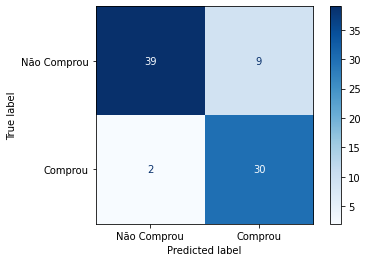

In [ ]:
plot_confusion_matrix(clf, x_test, y_test,
                        display_labels=["Não Comprou","Comprou"],
                        cmap=plt.cm.Blues)

In [ ]:
acc = (39 + 30) / (39 + 9 + 2 + 30)
print("Acurácia: ", 100 * acc, "%")

Acurácia:  86.25 %
